# Customer Segmentation

# Summary
outlined for a customer segmentation data science project:

Step 1. Collect and Clean Data
Step 2. Exploratory Data Analysis (EDA)
Step 3. Clustering using K-means
Step 3. Validate and Visualize Segments
Step 4. Detailed Report and Recommendations

# Step 1. Collect and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the data from the Excel file
data = pd.read_excel('ecom customer_data.xlsx')

# Display the first few rows of the data
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(data.isnull().sum())


First few rows of the dataset:
   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0 

# Step 2. Exploratory Data Analysis (EDA)


Summary statistics:
            Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      4.169800      0.267433      0.252333      0.222933   
std     8660.398374      3.590311      0.804778      0.705368      0.917494   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7500.750000      1.000000      0.000000      0.000000      0.000000   
50%    15000.500000      4.000000      0.000000      0.000000      0.000000   
75%    22500.250000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000     24.000000     15.000000     27.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  30000.000000  30000.000000            30000.000000  30000.000000   
mean       0.161333      0.143533                0.139767      0.106933   
std        0.740038      0.641258         

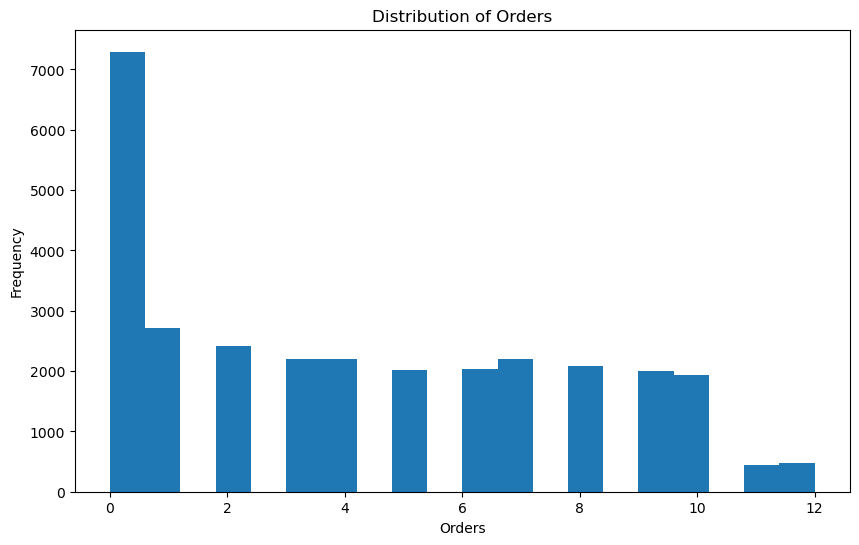

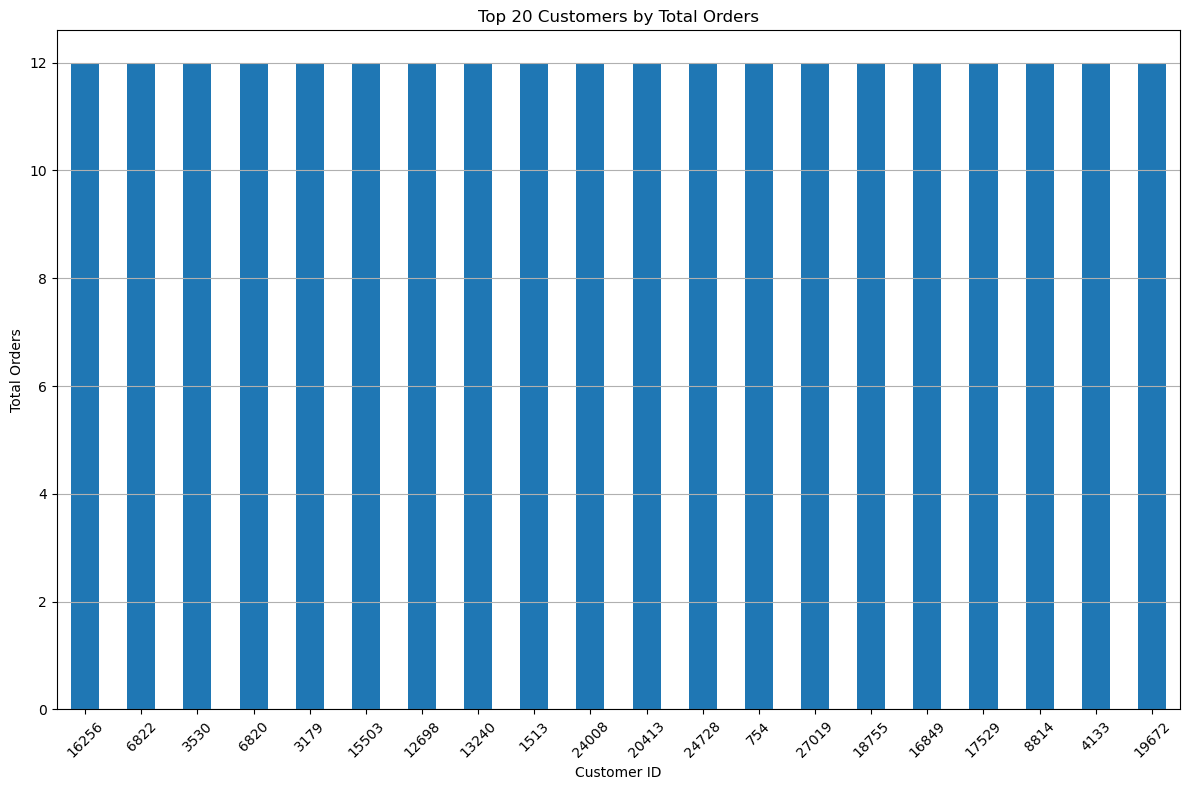

In [2]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Visualize the distribution of orders
plt.figure(figsize=(10, 6))
data['Orders'].hist(bins=20)
plt.title('Distribution of Orders')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Visualize the total purchase amount by customer
customer_totals = data.groupby('Cust_ID')['Orders'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
customer_totals.head(20).plot(kind='bar')
plt.title('Top 20 Customers by Total Orders')
plt.xlabel('Customer ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Step 3. Clustering using K-means

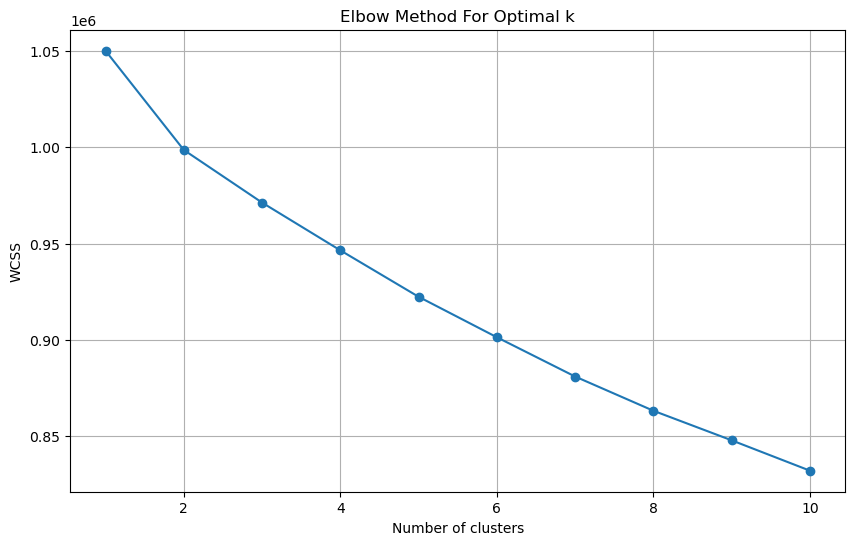

In [4]:
# Exclude non-numeric and identifier columns for clustering
features = data.drop(columns=['Cust_ID', 'Gender', 'Orders'])  # 'Orders' is excluded to avoid bias

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply K-means clustering with the chosen number of clusters
optimal_clusters = 4  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters


# Step 3. Validate and Visualize Segments

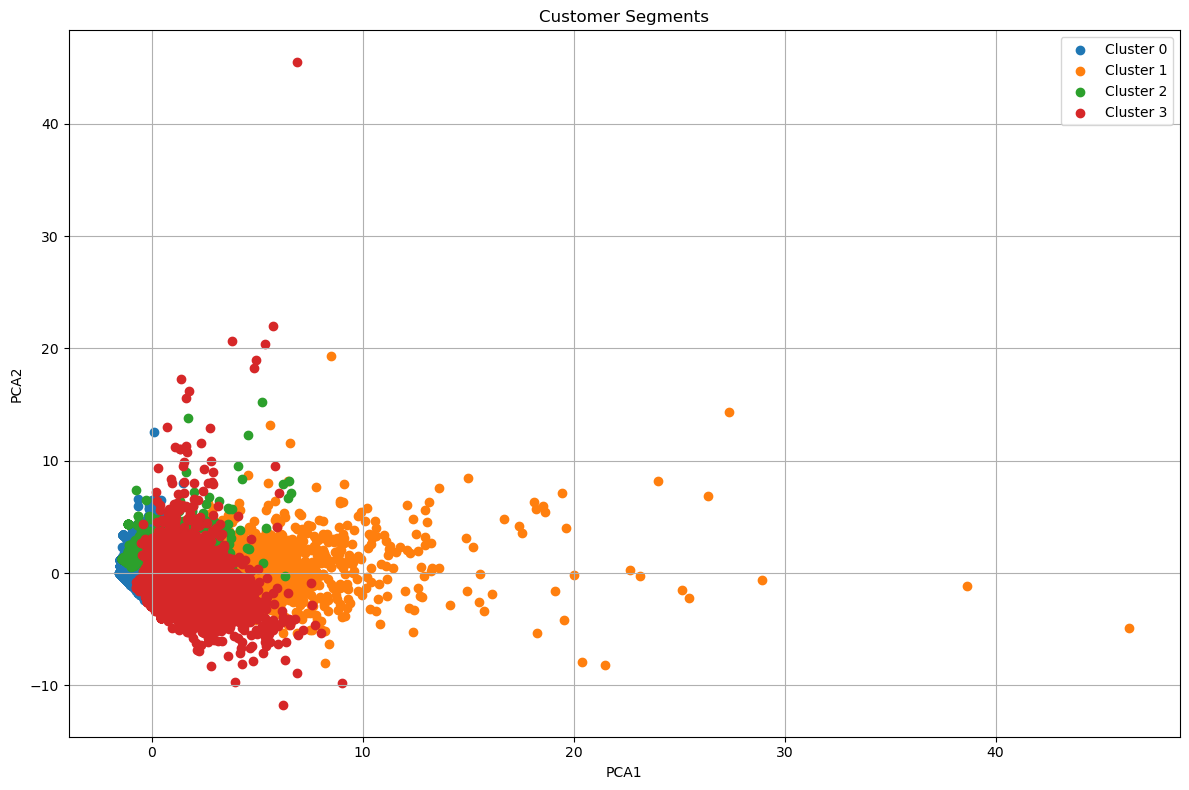

In [5]:
# Reduce the dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Create a dataframe with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster in range(optimal_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('Customer Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 4. Detailed Report and Recommendations

In [6]:
# Analyze each cluster
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Summary:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Generate recommendations
recommendations = {
    0: "Target Cluster 0 with premium products and personalized services.",
    1: "Engage Cluster 1 with loyalty programs and discounts.",
    2: "Offer educational content and value-added services to Cluster 2.",
    3: "Focus on upselling and cross-selling to Cluster 3."
}

print("\nRecommendations for each cluster:")
for cluster, recommendation in recommendations.items():
    print(f"Cluster {cluster}: {recommendation}")



Cluster 0 Summary:
            Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  22807.000000  22807.000000  22807.000000  22807.000000  22807.000000   
mean   14583.269873      4.094927      0.138203      0.138335      0.142149   
std     8637.947047      3.604222      0.457545      0.449041      0.609606   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7031.500000      0.000000      0.000000      0.000000      0.000000   
50%    14341.000000      4.000000      0.000000      0.000000      0.000000   
75%    22000.500000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000      5.000000      5.000000      9.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  22807.000000  22807.000000            22807.000000  22807.000000   
mean       0.074275      0.065989                0.093655      0.048757   
std        0.376464      0.324379          

            Cust_ID       Orders       Jordan     Gatorade      Samsung  \
count   5226.000000  5226.000000  5226.000000  5226.000000  5226.000000   
mean   16744.905855     4.469192     0.757176     0.670876     0.538079   
std     8580.745555     3.511990     1.425996     1.192633     1.632852   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%     9609.750000     1.000000     0.000000     0.000000     0.000000   
50%    17587.000000     4.000000     0.000000     0.000000     0.000000   
75%    24229.750000     7.000000     1.000000     1.000000     0.000000   
max    29992.000000    12.000000    24.000000    15.000000    27.000000   

              Asus         Udis  Mondelez International     Wrangler  \
count  5226.000000  5226.000000             5226.000000  5226.000000   
mean      0.519709     0.473785                0.308075     0.330080   
std       1.437067     1.258609                0.873206     0.979758   
min       0.000000     0.000000     

# Conclusion

Recommendations for each cluster:
Cluster 0: Target Cluster 0 with premium products and personalized services.
Cluster 1: Engage Cluster 1 with loyalty programs and discounts.
Cluster 2: Offer educational content and value-added services to Cluster 2.
Cluster 3: Focus on upselling and cross-selling to Cluster 3.